# Final Project: Heart Failure Prediction Using Supervised Learning Methods #
## GitHub repo URL ##
https://github.com/akirahanada/DTSA_5509_Final_Project.git

## 1. Data Source ##

The dataset is downloaded from Kaggle at the link:  

https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

## 2. Problem and Objectives ##  

Cardiovascular diseases (CVDs) are a global health concern leading to 17.9 million deaths annually making up 31% of all worldwide deaths. The majority of these fatalities are caused by heart attacks and strokes with a portion occurring prematurely in individuals, under 70 years old. Heart failure is a consequence of diseases and this dataset includes 11 factors that can aid in foreseeing potential heart issues.
Individuals with cardiovascular ailments or those at high risk (due to factors like hypertension diabetes, high cholesterol levels or existing conditions) require early detection and proper management where the application of machine learning models can be beneficial

Early identification of individuals at risk, for diseases and ensuring they receive suitable care can help prevent untimely dhs.



## 3. Supervised Learning Techniques ##  

I created predictive models using the following Supervised Learning Metods that we learnt about in this lesson and evaluated them against each one.
- K-Nearest Neighbors
- Logistic Regression model
- Decision Tree
- Random Forest
- Adaboost classifier
- Support Vector Machine
  
## 4. Data Description ##  

As shown below, this data has a total of 918 records with 12 attributes.  

|  attributes | Description  |  Data type |  Explanation | 
|---|:---:|---|:---:|
|  Age |  age of the patient |  Numeri |  years | 
|  Sex |  sex of the patient | Categorica  |  M: Male, F: Female | 
|  ChestPainTyp | chest pain type  | Categorical |  TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic | 
|  RestingB | resting blood pressur  | Numeric  |  mm H | 
|  Cholesterol | serum cholesterol  | Numeric  | mm/dl  | 
|  FastingBS |  fasting blood sugar | Numeric  |  1: if FastingBS > 120 mg/dl, 0: otherwise | 
|  RestingECG  | resting electrocardiogram results  | Categorical  |  Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV),<br> LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria | 
| MaxHR  |  maximum heart rate achieved | Numeric  | Numeric value between 60 and 202  | 
|  ExerciseAngina | exercise-induced angina  |  Categorical |  Y: Yes, N: No | 
| Oldpeak  | oldpeak = ST  |  Numeric |  Numeric value measured in depression | 
|  ST_Slope |  the slope of the peak exercise ST segment |  Categorical | Up: upsloping, Flat: flat, Down: downsloping  | 
| HeartDisease  | output class  |  Categorical |  1: heart disease, 0: Normal | 


## 5. Load Data and Preprocessing ##

Check the contents of the data set and chart the frequency of categorical data.

In [25]:
import warnings
warnings.simplefilter('ignore')

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age    

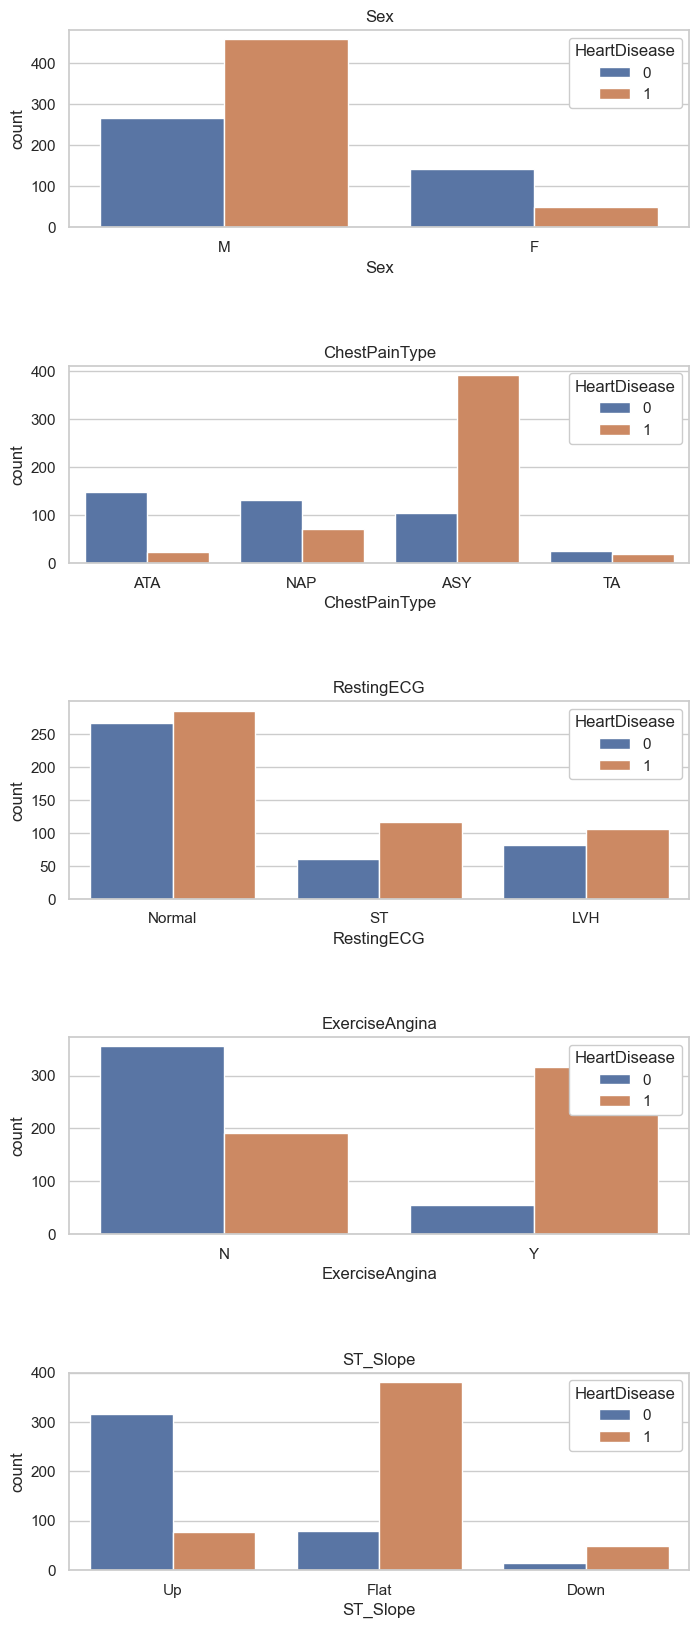

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
data = pd.read_csv('heart.csv')

# Display the first few rows of the dataset to understand its structure
data.head()

# Display basic info to check columns and types
print(data.head())
print(data.info())

# Convert 'HeartDisease' column to string type
data['HeartDisease'] = data['HeartDisease'].astype(str)

# Specify categorical and numerical columns
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Create subplots for categorical features and numerical columns
fig, axs = plt.subplots(len(categorical_features), figsize=(8, 20))


# Plot categorical features
for i, feature in enumerate(categorical_features):
    sns.countplot(data=data, x=feature, hue='HeartDisease', ax=axs[i])
    axs[i].set_title(feature)
    # Modify legend properties
    axs[i].legend(title='HeartDisease', loc='upper right', frameon=True, framealpha=1)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.7)

# Show the plot
plt.show()


#### Data Cleaning ####
The dataset has no NULL. All 918 rows and 12 columns have the data.  
However, I must convert 'HeartDisease' column to string type in advance.    
Next, I specify categorical and numerical columns.

#### Categorical Features ####
The above chart shows that males with ChestPainType = ASY and Flat_ST_Slop = Flat tend to have more heart disease.  
As a next step, I create a histogram from the numeric_feature.

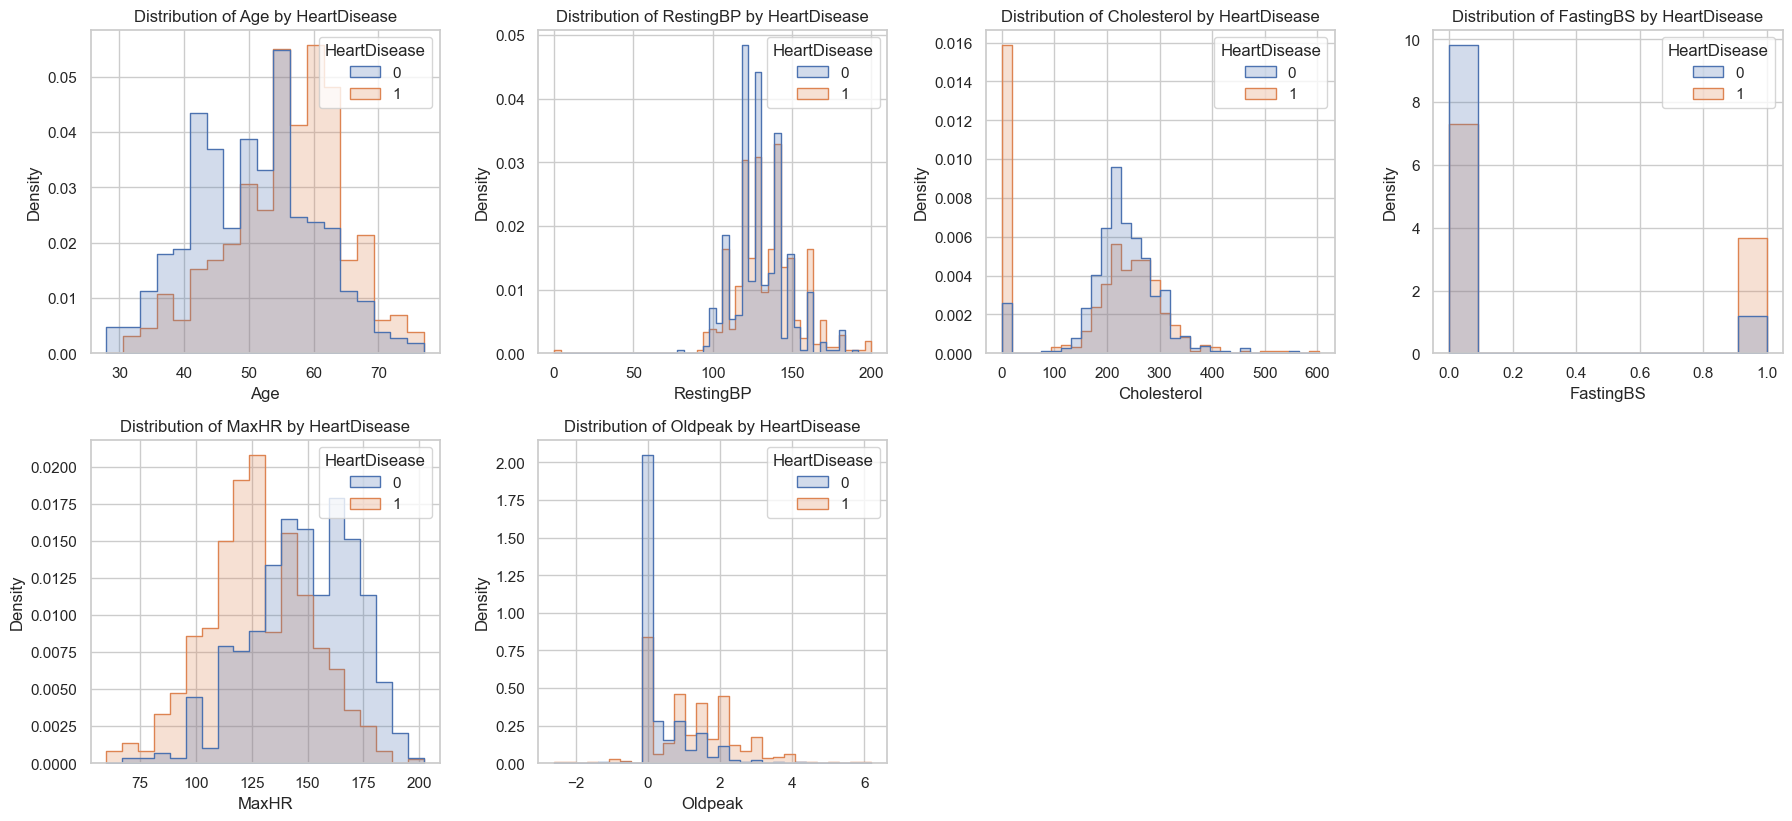

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the aesthetics for the plots
sns.set(style="whitegrid")

# Creating histograms for each numeric feature colored by HeartDisease
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(18, 12))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data=data, x=feature, hue='HeartDisease', element='step', stat='density', common_norm=False)
    plt.title(f'Distribution of {feature} by HeartDisease')

plt.tight_layout()
plt.show()

#### Numeric Features ####

From the histogram above, it appears that Heart Disease is more common in older people, those with Cholesterol close to 0, FastingBS = 1, low MaxHR, and high Oldpeak.  
As a next step, I create a paired plot of NUMERICAL features.

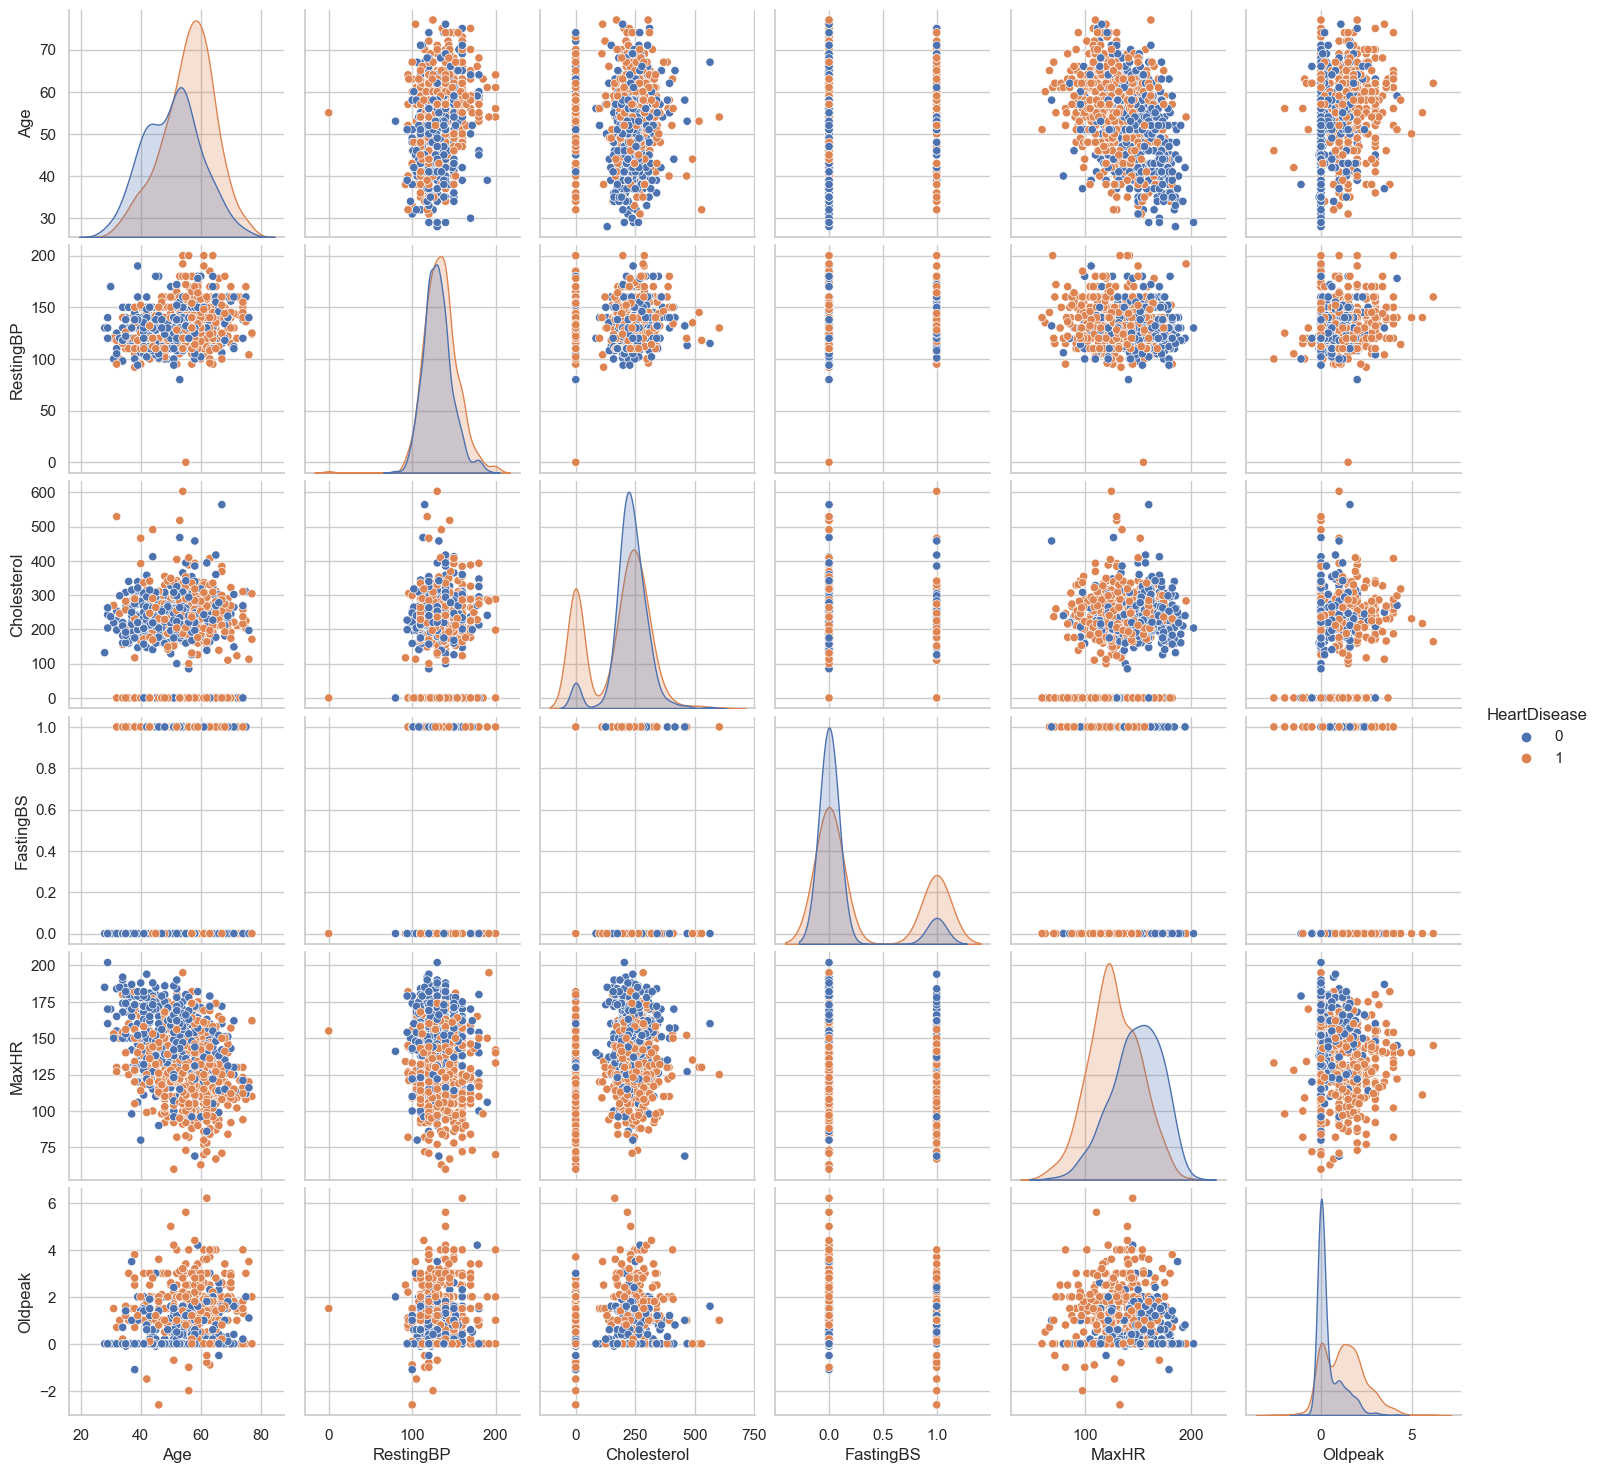

In [33]:
import numpy as np

# Identify numerical features
numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()

# Plotting pairwise relationships
sns.pairplot(data[numerical_features + ['HeartDisease']], hue='HeartDisease')
plt.show()

The above-paired plot confirms the separation of the plot areas of apparent Disease symptoms in MaxHR, Oldpeak, and Cholesterol.

## 6. K-Nearest Neighbors Models ##

I create a predictive model using K-Nearest Neighbours.  
First, I separate the dataset into training and testing.  
Next, I create a K-Nearest Neighbours model to determine Heart Disease, perform similar calculations from K = 1 to 10, and select the best model.  
Then, I create ACC, TPR, TNR, PPV, FPR, FNR, F1, ROC, and Confusion Matrix.  
Then, I create a chart of the ROC curve.  
Next, a sensitivity analysis is used to analyze the permutation feature importance.

Best K value: 5
Accuracy: 0.8641304347826086
Precision (PPV): 0.9183673469387755
Recall (TPR): 0.8411214953271028
F1 Score: 0.8780487804878049
ROC AUC Score: 0.8686126957154994
True Positive Rate (TPR): 0.8411214953271028
True Negative Rate (TNR): 0.8961038961038961
False Positive Rate (FPR): 0.1038961038961039
False Negative Rate (FNR): 0.1588785046728972


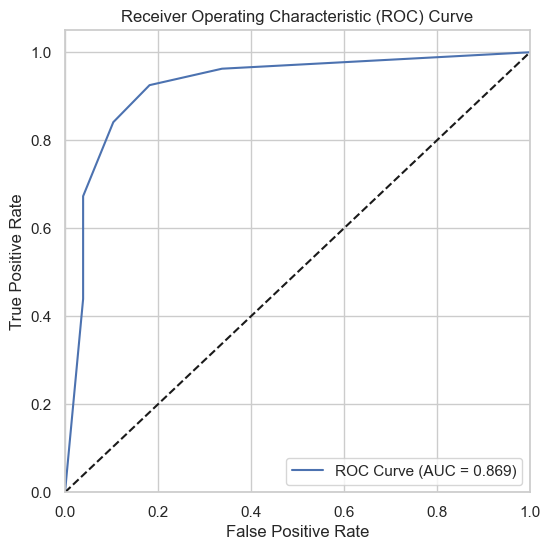

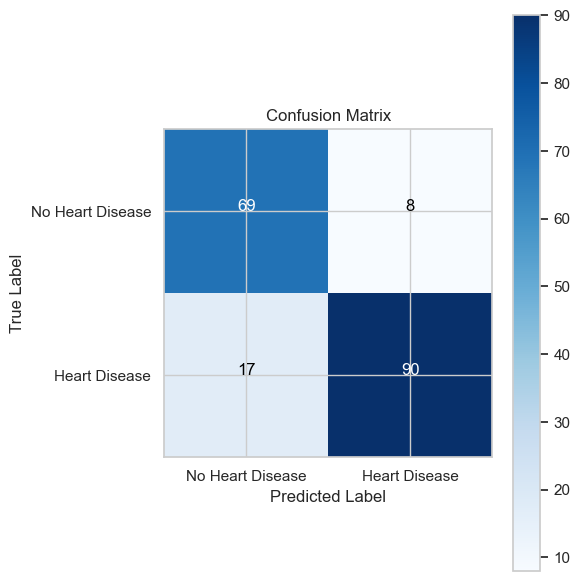

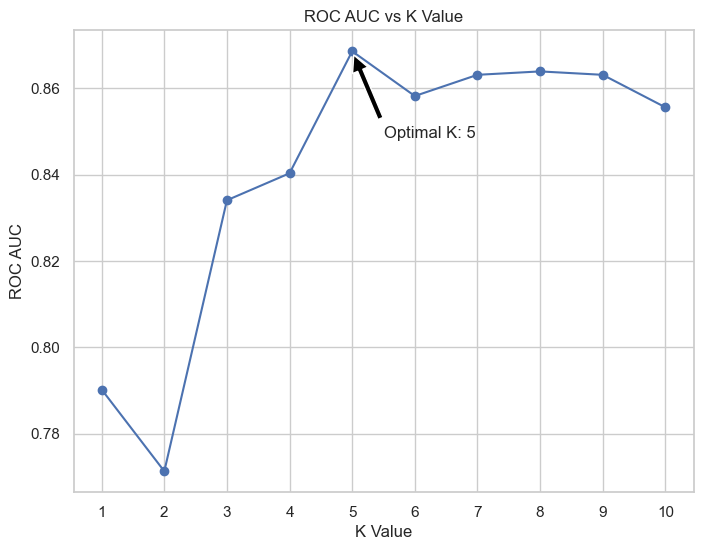

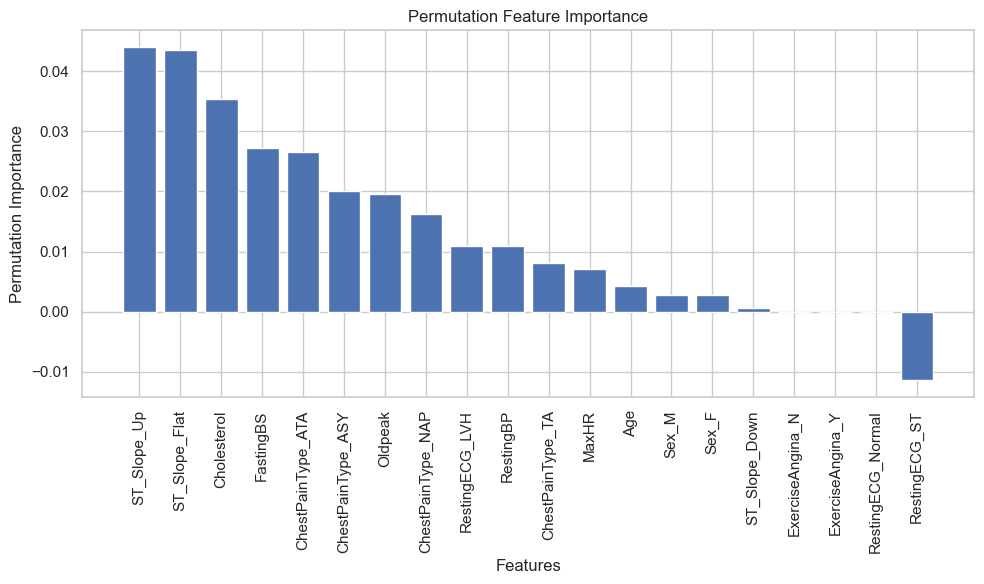

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Read the dataset
data = pd.read_csv('heart.csv')

# Separate the features (X) and target variable (y)
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

# Handle categorical features
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
X_encoded = pd.get_dummies(X, columns=categorical_features)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize lists to store evaluation metrics for different K values
k_values = list(range(1, 11))
accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_auc_scores = []

# Iterate over different K values
for k in k_values:
    # Create a KNN classifier with the current K value
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model
    knn.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = knn.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Append the metrics to the respective lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)

# Select the best model based on the highest ROC AUC score
best_k = k_values[np.argmax(roc_auc_scores)]
best_model = KNeighborsClassifier(n_neighbors=best_k)
best_model.fit(X_train, y_train)

# Make predictions using the best model
y_pred_best = best_model.predict(X_test)

# Calculate confusion matrix for the best model
cm = confusion_matrix(y_test, y_pred_best)
tn, fp, fn, tp = cm.ravel()

# Calculate evaluation metrics for the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_pred_best)

# Calculate additional evaluation metrics for the best model
tpr = recall_best
tnr = tn / (tn + fp)
ppv = precision_best
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

# Print the evaluation metrics for the best model
print("Best K value:", best_k)
print("Accuracy:", accuracy_best)
print("Precision (PPV):", precision_best)
print("Recall (TPR):", recall_best)
print("F1 Score:", f1_best)
print("ROC AUC Score:", roc_auc_best)
print("True Positive Rate (TPR):", tpr)
print("True Negative Rate (TNR):", tnr)
print("False Positive Rate (FPR):", fpr)
print("False Negative Rate (FNR):", fnr)

# Plot the ROC curve for the best model
fpr_best, tpr_best, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(6, 6))
plt.plot(fpr_best, tpr_best, label=f'ROC Curve (AUC = {roc_auc_best:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Perform sensitivity analysis using permutation feature importance
result = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42)
importances = result.importances_mean
feature_names = X_encoded.columns

# Sort the features by importance
sorted_idx = importances.argsort()[::-1]
sorted_importances = importances[sorted_idx]
sorted_feature_names = feature_names[sorted_idx]

# Plot the confusion matrix for the best model
plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['No Heart Disease', 'Heart Disease'])
plt.yticks(tick_marks, ['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add value labels inside each cell of the confusion matrix
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()


# Plot ROC AUC vs K value
plt.figure(figsize=(8, 6))
plt.plot(k_values, roc_auc_scores, marker='o')
plt.xlabel('K Value')
plt.ylabel('ROC AUC')
plt.title('ROC AUC vs K Value')
plt.xticks(k_values)
plt.grid(True)

# Annotate the optimal K value
optimal_k_index = np.argmax(roc_auc_scores)
optimal_k = k_values[optimal_k_index]
optimal_roc_auc = roc_auc_scores[optimal_k_index]
plt.annotate(f'Optimal K: {optimal_k}', xy=(optimal_k, optimal_roc_auc),
             xytext=(optimal_k + 0.5, optimal_roc_auc - 0.02),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()


# Perform sensitivity analysis using permutation feature importance
result = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42)
importances = result.importances_mean
feature_names = X_encoded.columns

# Sort the features by importance
sorted_idx = importances.argsort()[::-1]
sorted_importances = importances[sorted_idx]
sorted_feature_names = feature_names[sorted_idx]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances)
plt.xticks(range(len(sorted_importances)), sorted_feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Permutation Importance')
plt.title('Permutation Feature Importance')
plt.tight_layout()
plt.show()

#### K-Nearest Neighbors' Results and interpretation ####

The ROC AUC score is best when K = 5, so this is the best value: ROC AUC = 0.869, Precision (PPV) = 0.91837, and True Positive Rate (TPR) = 0.841.  
However, False Negative Rate (FNR) = 0.1589, indicating an approximately 16% rate of incorrectly predicting that Cardiovascular diseases (CVDs) are not Cardiovascular diseases (CVDs) despite being Cardiovascular diseases (CVDs).  
The higher the True Positive Rate (TPR) and the lower the False Negative Rate (FNR), the better the disease prediction model.  
The Permutation Importance chart shows that essential features are ST_Slope_Up, ST_Slope_Flat, and Cholesterol.

## 7. Logistic Regression model ##

Next, this study will create a logistic regression model to determine heart disease.  
First, I separate the data for training and testing and train on the logistic regression model with the training data.  
Next, I display the logistic regression coefficients on a graph with the data sorted in descending order by absolute value of the coefficients.  
Using the predicted data, create a Confusion Matrix with ACC, TPR, TNR, PPV, FPR, FNR, F1 and ROC.  
Then, I create a graph of the Confusion Matrix.  
And create a graph of the ROC curve.  
Then, as a sensitivity analysis, a graph of the permutation feature importance is created.

Logistic Regression Coefficients:
ST_Slope_Flat: 1.1929272023765831
ST_Slope_Up: -1.1453357506197877
ChestPainType_ASY: 1.0098354304139856
FastingBS: 0.880226110937606
Sex_M: 0.64261483872613
Sex_F: -0.6289826432507754
ExerciseAngina_Y: 0.5584013130027338
ExerciseAngina_N: -0.5447691175258026
ChestPainType_NAP: -0.49541096415709185
ChestPainType_ATA: -0.4628916455935112
Oldpeak: 0.45109860837063953
RestingECG_LVH: 0.22102128381702363
RestingECG_ST: -0.20106734747837235
ChestPainType_TA: -0.03790062518684308
ST_Slope_Down: -0.033959256280870556
Age: 0.011924187572017285
RestingECG_Normal: -0.006321740862809468
MaxHR: -0.005849152862558167
Cholesterol: -0.00491924094679748
RestingBP: 0.0002438076031135912


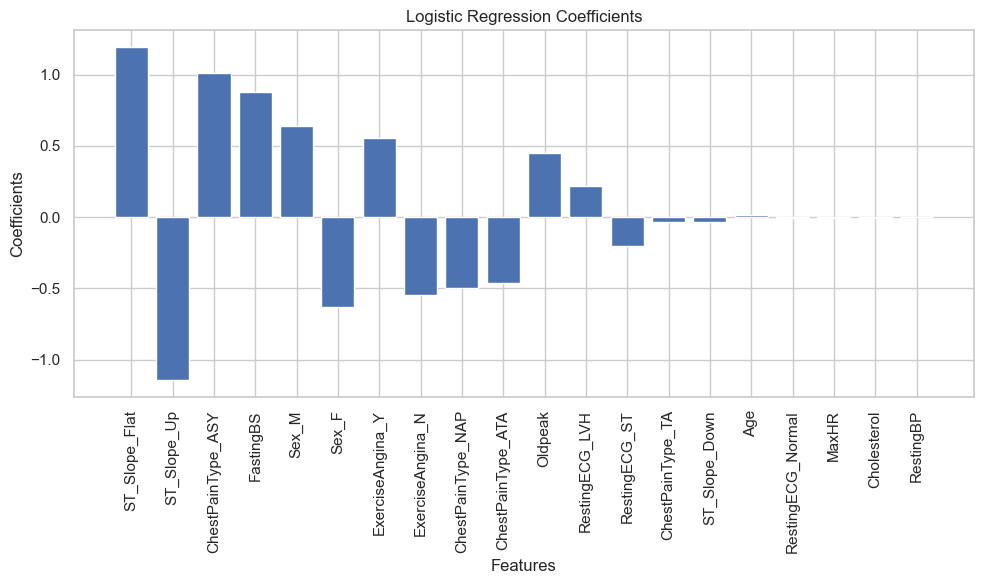

Accuracy: 0.8532608695652174
Confusion Matrix:
[[67 10]
 [17 90]]
Precision (PPV): 0.9
Recall (TPR): 0.8411214953271028
F1 Score: 0.8695652173913043
ROC AUC Score: 0.8556256827284863
True Positive Rate (TPR): 0.8411214953271028
True Negative Rate (TNR): 0.8701298701298701
False Positive Rate (FPR): 0.12987012987012986
False Negative Rate (FNR): 0.1588785046728972


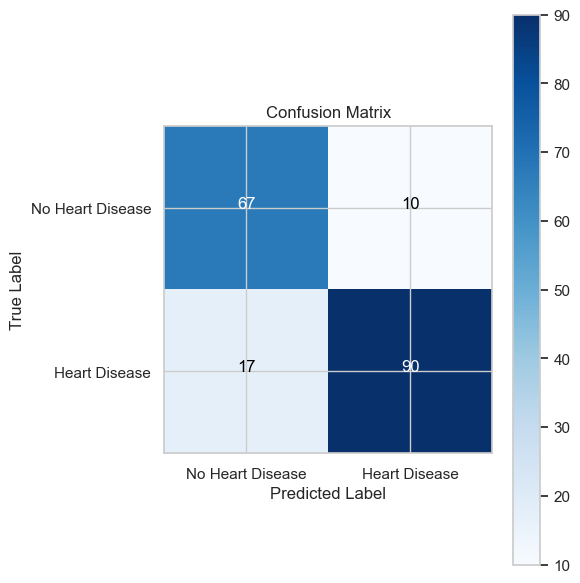

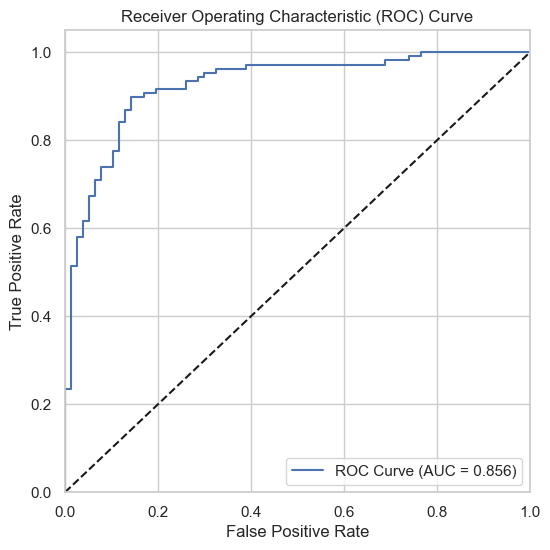

Permutation Feature Importance:
ST_Slope_Flat: 0.022 (+/- 0.007)
ST_Slope_Up: 0.018 (+/- 0.007)
ChestPainType_ASY: 0.018 (+/- 0.006)
FastingBS: 0.014 (+/- 0.007)
ChestPainType_ATA: 0.009 (+/- 0.005)
Cholesterol: 0.005 (+/- 0.012)
Sex_M: 0.003 (+/- 0.004)
Sex_F: 0.003 (+/- 0.004)
ChestPainType_NAP: 0.001 (+/- 0.005)
RestingECG_Normal: 0.000 (+/- 0.000)
ChestPainType_TA: 0.000 (+/- 0.000)
MaxHR: 0.000 (+/- 0.002)
ST_Slope_Down: 0.000 (+/- 0.000)
RestingBP: 0.000 (+/- 0.000)
Oldpeak: -0.002 (+/- 0.012)
RestingECG_ST: -0.002 (+/- 0.004)
ExerciseAngina_N: -0.004 (+/- 0.004)
ExerciseAngina_Y: -0.004 (+/- 0.004)
RestingECG_LVH: -0.006 (+/- 0.004)
Age: -0.010 (+/- 0.003)


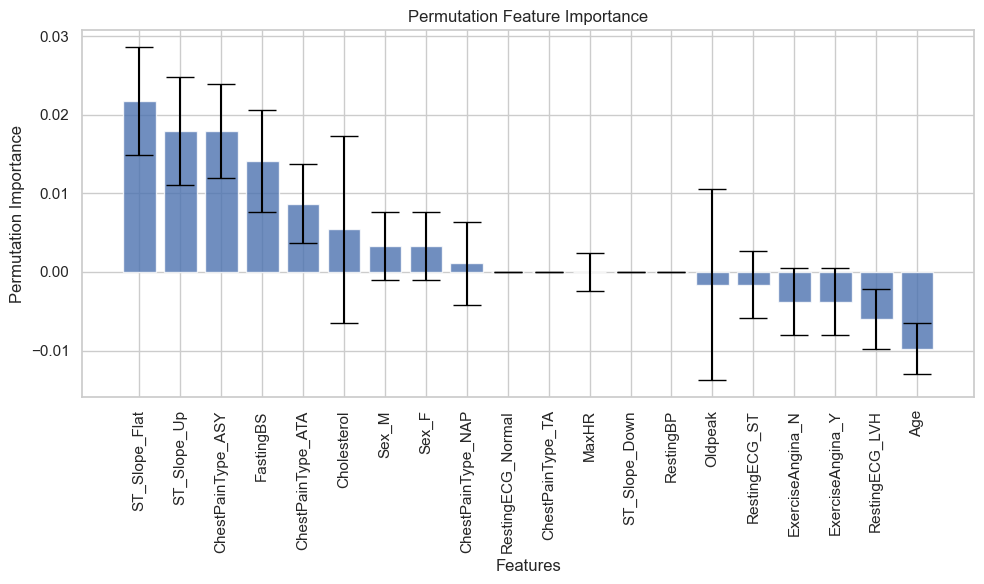

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Read the dataset
data = pd.read_csv('heart.csv')

# Separate the features (X) and target variable (y)
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Get the coefficients of the model
coefficients = model.coef_[0]
feature_names = X.columns

# Sort the coefficients by absolute value in descending order
sorted_indices = np.argsort(np.abs(coefficients))[::-1]
sorted_coefficients = coefficients[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Print the sorted coefficients
print("Logistic Regression Coefficients:")
for feature, coef in zip(sorted_feature_names, sorted_coefficients):
    print(f"{feature}: {coef}")

# Plot the sorted coefficients
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_coefficients)), sorted_coefficients)
plt.xticks(range(len(sorted_coefficients)), sorted_feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Logistic Regression Coefficients')
plt.tight_layout()
plt.show()

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

tn, fp, fn, tp = confusion.ravel()
tpr = recall
tnr = tn / (tn + fp)
ppv = precision
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion)
print("Precision (PPV):", precision)
print("Recall (TPR):", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("True Positive Rate (TPR):", tpr)
print("True Negative Rate (TNR):", tnr)
print("False Positive Rate (FPR):", fpr)
print("False Negative Rate (FNR):", fnr)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(confusion, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['No Heart Disease', 'Heart Disease'])
plt.yticks(tick_marks, ['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
thresh = confusion.max() / 2.0
for i in range(confusion.shape[0]):
    for j in range(confusion.shape[1]):
        plt.text(j, i, format(confusion[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if confusion[i, j] > thresh else "black")
plt.tight_layout()
plt.show()

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Perform sensitivity analysis using permutation feature importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
importances = result.importances_mean
std = result.importances_std

# Sort the features by importance
sorted_idx = importances.argsort()[::-1]
sorted_importances = importances[sorted_idx]
sorted_std = std[sorted_idx]
sorted_feature_names = X.columns[sorted_idx]

# Print the sorted feature importances
print("Permutation Feature Importance:")
for feature, importance, std in zip(sorted_feature_names, sorted_importances, sorted_std):
    print(f"{feature}: {importance:.3f} (+/- {std:.3f})")

# Plot the feature importances with error bars
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances, yerr=sorted_std, align='center', alpha=0.8, ecolor='black', capsize=10)
plt.xticks(range(len(sorted_importances)), sorted_feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Permutation Importance')
plt.title('Permutation Feature Importance')
plt.tight_layout()
plt.show()

#### Logistic Regressio's Results and interpretation ####

The Logistic Regression model's ROC AUC score is lower than K-Nearest Neighbours', with ROC AUC = 0.856. Precision (PPV) = 0.9, and True Positive Rate (TPR) = 0.841.  
However, the false negative rate (FNR) = 0.159, indicating that there is a rate of approximately 16% that incorrectly predicts cardiovascular disease (CVD) but not cardiovascular disease (CVD).  
The higher the true positive rate (TPR) and the lower the false negative rate (FNR), the better the disease prediction model.  
The permutation importance chart shows that the highest essential features are ST_Slope_Flat, ST_Slope_Up, and ChestPainType_ASY.

## 8. Decision Tree ##

This study divides the dataset into training and testing datasets to train a decision tree model to determine the Heart Disease. The best model is selected using gridsearchCV.  
A graph of the accuracy and alpha values of the datasets for training and testing is created.  
Then, I create ACC, TPR, TNR, PPV, FPR, FNR, F1, ROC, and Confusion Matrix.  
Then, a graph of the ROC curve is created.  
Then, I  create a graph of the Confusion Matrix.  
It is essential to visualize the decision tree as it provides a clear understanding of the model's structure and the factors it considers in determining Heart Disease. This aids in interpreting the model's predictions.  
Next, the permutation feature importance is analyzed as a sensitivity analysis.

Best Hyperparameters:
{'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2}


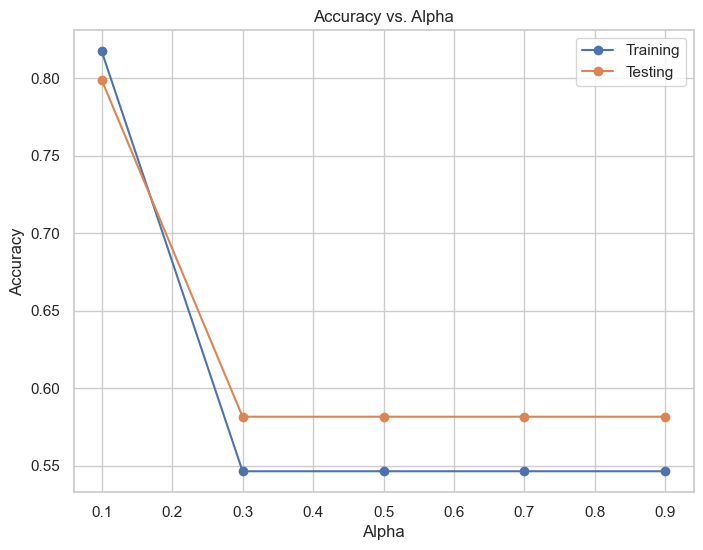

Accuracy (Best Model): 0.875
Confusion Matrix (Best Model):
[[66 11]
 [12 95]]
Precision (PPV) (Best Model): 0.8962264150943396
Recall (TPR) (Best Model): 0.8878504672897196
F1 Score (Best Model): 0.892018779342723
ROC AUC Score (Best Model): 0.8724966622162884
True Positive Rate (TPR) (Best Model): 0.8878504672897196
True Negative Rate (TNR) (Best Model): 0.8571428571428571
False Positive Rate (FPR) (Best Model): 0.14285714285714285
False Negative Rate (FNR) (Best Model): 0.11214953271028037


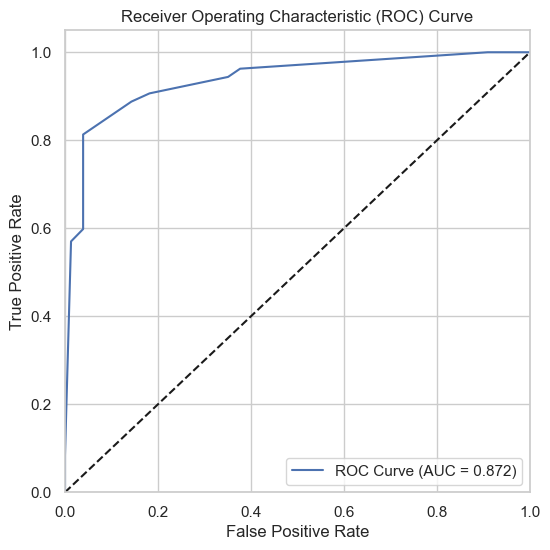

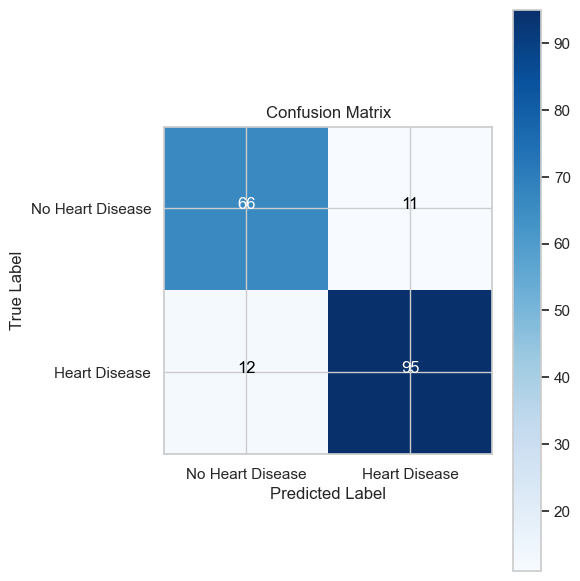

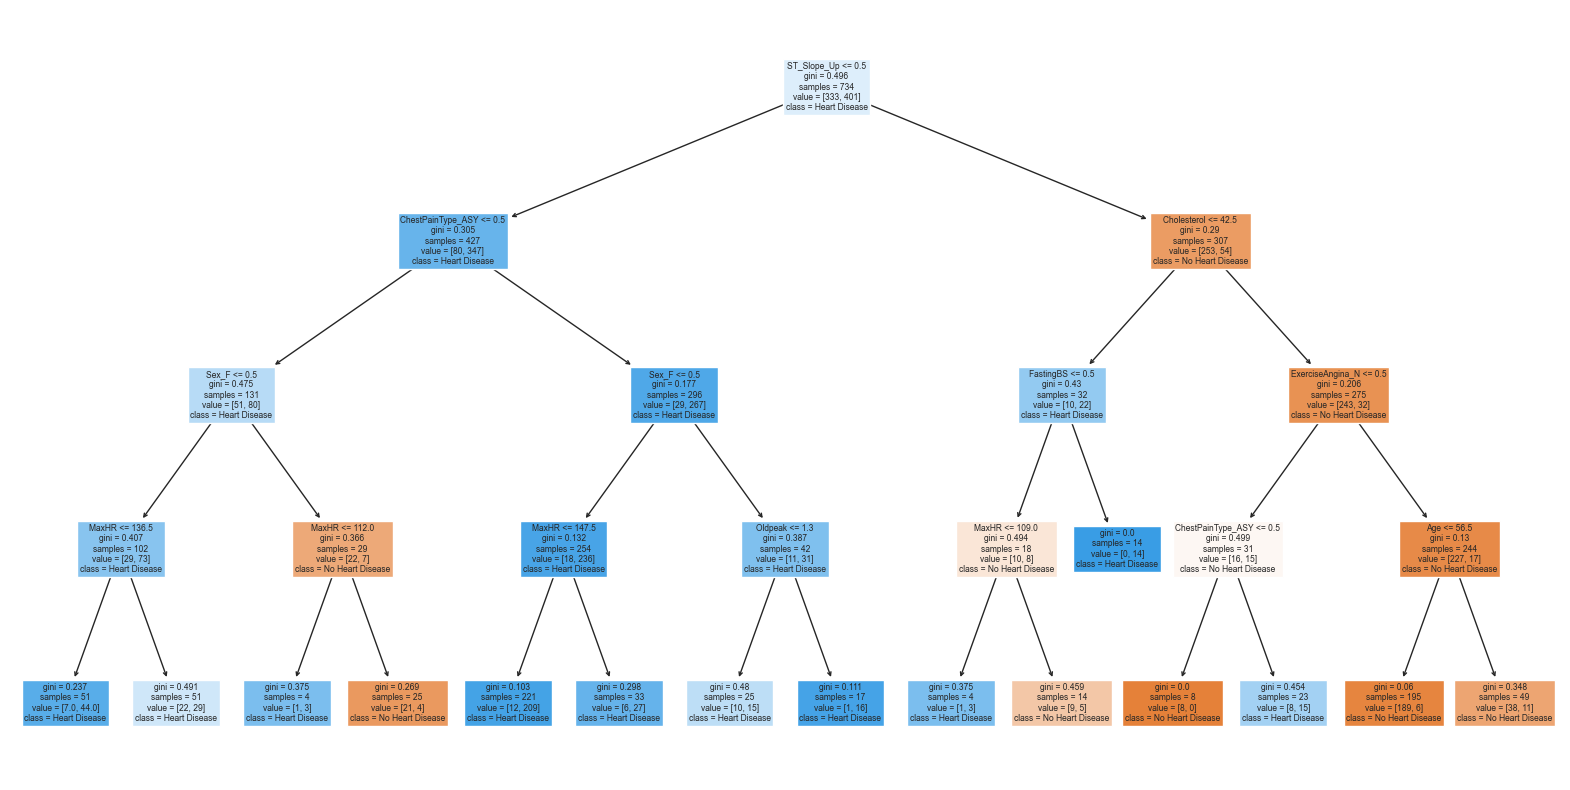

Permutation Feature Importance:
ST_Slope_Up: 0.209 (+/- 0.021)
Cholesterol: 0.046 (+/- 0.012)
ChestPainType_ASY: 0.040 (+/- 0.013)
FastingBS: 0.037 (+/- 0.010)
ExerciseAngina_N: 0.023 (+/- 0.008)
Sex_F: 0.002 (+/- 0.006)
MaxHR: 0.001 (+/- 0.004)
RestingBP: 0.000 (+/- 0.000)
Oldpeak: 0.000 (+/- 0.000)
Sex_M: 0.000 (+/- 0.000)
ChestPainType_ATA: 0.000 (+/- 0.000)
ST_Slope_Flat: 0.000 (+/- 0.000)
ChestPainType_NAP: 0.000 (+/- 0.000)
ChestPainType_TA: 0.000 (+/- 0.000)
RestingECG_LVH: 0.000 (+/- 0.000)
RestingECG_Normal: 0.000 (+/- 0.000)
RestingECG_ST: 0.000 (+/- 0.000)
ExerciseAngina_Y: 0.000 (+/- 0.000)
ST_Slope_Down: 0.000 (+/- 0.000)
Age: 0.000 (+/- 0.000)


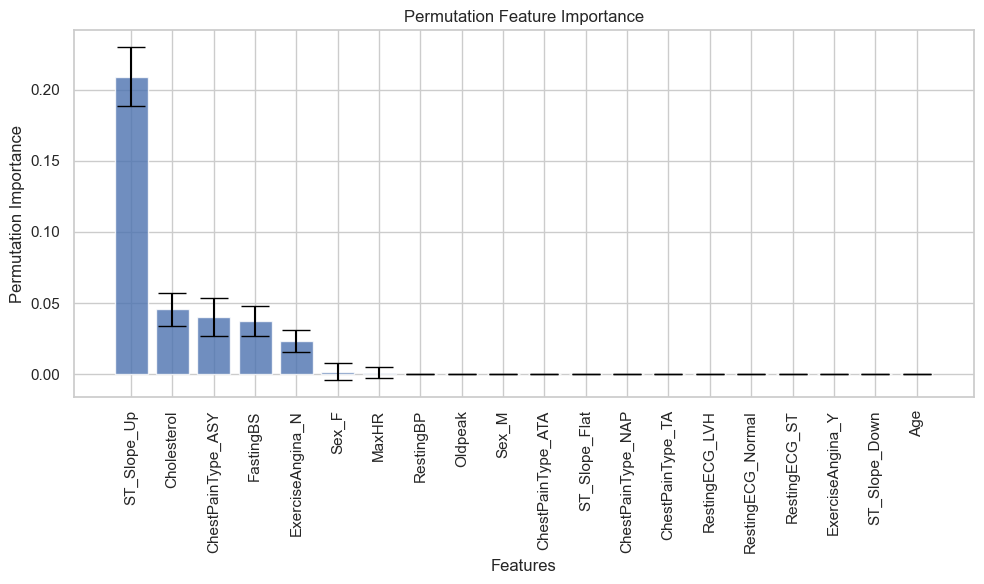

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Read the dataset
data = pd.read_csv('heart.csv')

# Separate the features (X) and target variable (y)
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Perform grid search to find the best hyperparameters
param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(grid_search.best_params_)

# Plot accuracy vs. alpha for training and testing datasets
alphas = [0.1, 0.3, 0.5, 0.7, 0.9]
train_accuracies = []
test_accuracies = []

for alpha in alphas:
    model = DecisionTreeClassifier(ccp_alpha=alpha, random_state=42)
    model.fit(X_train, y_train)
    train_accuracies.append(model.score(X_train, y_train))
    test_accuracies.append(model.score(X_test, y_test))

plt.figure(figsize=(8, 6))
plt.plot(alphas, train_accuracies, marker='o', label='Training')
plt.plot(alphas, test_accuracies, marker='o', label='Testing')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Alpha')
plt.legend()
plt.show()

# Make predictions using the best model
y_pred_best = best_model.predict(X_test)

# Calculate evaluation metrics for the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
confusion_best = confusion_matrix(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_pred_best)

tn, fp, fn, tp = confusion_best.ravel()
tpr = recall_best
tnr = tn / (tn + fp)
ppv = precision_best
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

# Print the evaluation metrics for the best model
print("Accuracy (Best Model):", accuracy_best)
print("Confusion Matrix (Best Model):")
print(confusion_best)
print("Precision (PPV) (Best Model):", precision_best)
print("Recall (TPR) (Best Model):", recall_best)
print("F1 Score (Best Model):", f1_best)
print("ROC AUC Score (Best Model):", roc_auc_best)
print("True Positive Rate (TPR) (Best Model):", tpr)
print("True Negative Rate (TNR) (Best Model):", tnr)
print("False Positive Rate (FPR) (Best Model):", fpr)
print("False Negative Rate (FNR) (Best Model):", fnr)

# Plot the ROC curve for the best model
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(6, 6))
plt.plot(fpr_best, tpr_best, label=f'ROC Curve (AUC = {roc_auc_best:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(confusion_best, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['No Heart Disease', 'Heart Disease'])
plt.yticks(tick_marks, ['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
thresh = confusion_best.max() / 2.0
for i in range(confusion_best.shape[0]):
    for j in range(confusion_best.shape[1]):
        plt.text(j, i, format(confusion_best[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if confusion_best[i, j] > thresh else "black")
plt.tight_layout()
plt.show()

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_model, filled=True, feature_names=X.columns, class_names=['No Heart Disease', 'Heart Disease'])
plt.show()

# Perform sensitivity analysis using permutation feature importance
result = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42)
importances = result.importances_mean
std = result.importances_std

# Sort the features by importance
sorted_idx = importances.argsort()[::-1]
sorted_importances = importances[sorted_idx]
sorted_std = std[sorted_idx]
sorted_feature_names = X.columns[sorted_idx]

# Print the sorted feature importances
print("Permutation Feature Importance:")
for feature, importance, std in zip(sorted_feature_names, sorted_importances, sorted_std):
    print(f"{feature}: {importance:.3f} (+/- {std:.3f})")

# Plot the feature importances with error bars
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances, yerr=sorted_std, align='center', alpha=0.8, ecolor='black', capsize=10)
plt.xticks(range(len(sorted_importances)), sorted_feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Permutation Importance')
plt.title('Permutation Feature Importance')
plt.tight_layout()
plt.show()

#### Decision Tree's Results and interpretation ####

The decision tree model's ROC AUC score is higher than K-Nearest Neighbours', with ROC AUC = 0.872. Precision (PPV) = 0.896, and True Positive Rate (TPR) = 0.888.  
However, the false negative rate (FNR) = 0.112 indicates that there is a rate of approximately 11% that incorrectly predicts cardiovascular disease (CVD) but not cardiovascular disease (CVD).  
The better the disease prediction model, the higher the true positive rate (TPR) and the lower the false negative rate (FNR).  
The best decision tree is visualized with max_depth=4, min_samples_leaf=4, and min_samples_split=2. It is easy to understand and determine whether heart disease is or not.  
The permutation importance chart shows that the highest essential features are ST_Slope_Up, Cholesterol, and ChestPainType_ASY.

## 9. Random Forest ##

This Study divides the data into training and testing datasets and creates a Random Forest model to determine heart disease.  
ACC, TPR, TNR, PPV, FPR, FNR, F1, ROC, and Confusion Matrix are created.  
Then, create a graph of the ROC curve.  
Then, create a graph of the Confusion Matrix.  
Then, visualize the decision tree.  
Next, a sensitivity analysis is used to analyze the importance of the permutation feature.

Accuracy: 0.8804347826086957
Confusion Matrix:
[[67 10]
 [12 95]]
Precision (PPV): 0.9047619047619048
Recall (TPR): 0.8878504672897196
F1 Score: 0.8962264150943396
ROC AUC Score: 0.8789901687097949
True Positive Rate (TPR): 0.8878504672897196
True Negative Rate (TNR): 0.8701298701298701
False Positive Rate (FPR): 0.12987012987012986
False Negative Rate (FNR): 0.11214953271028037


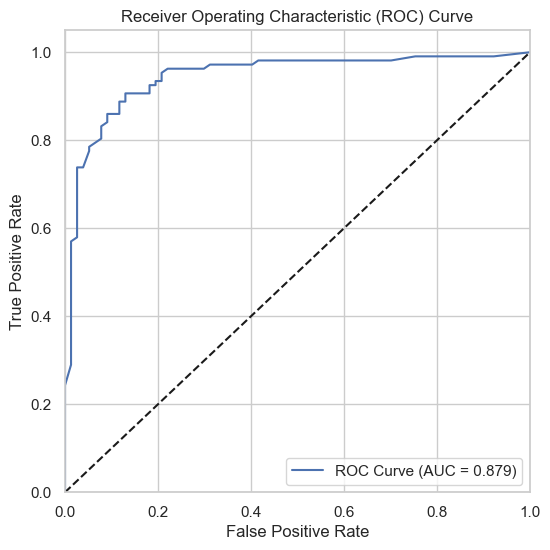

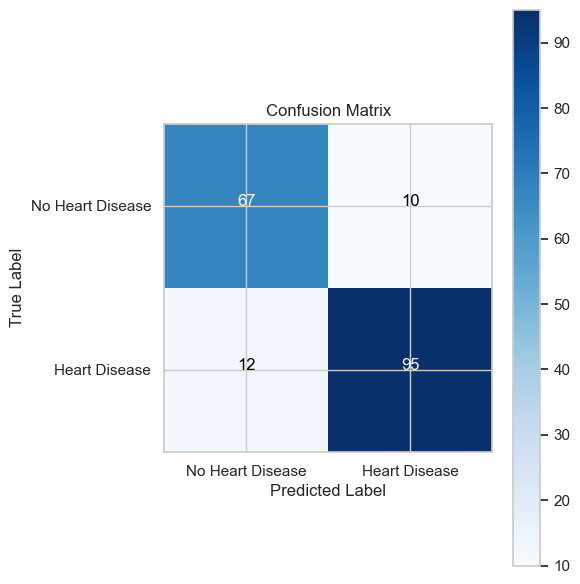

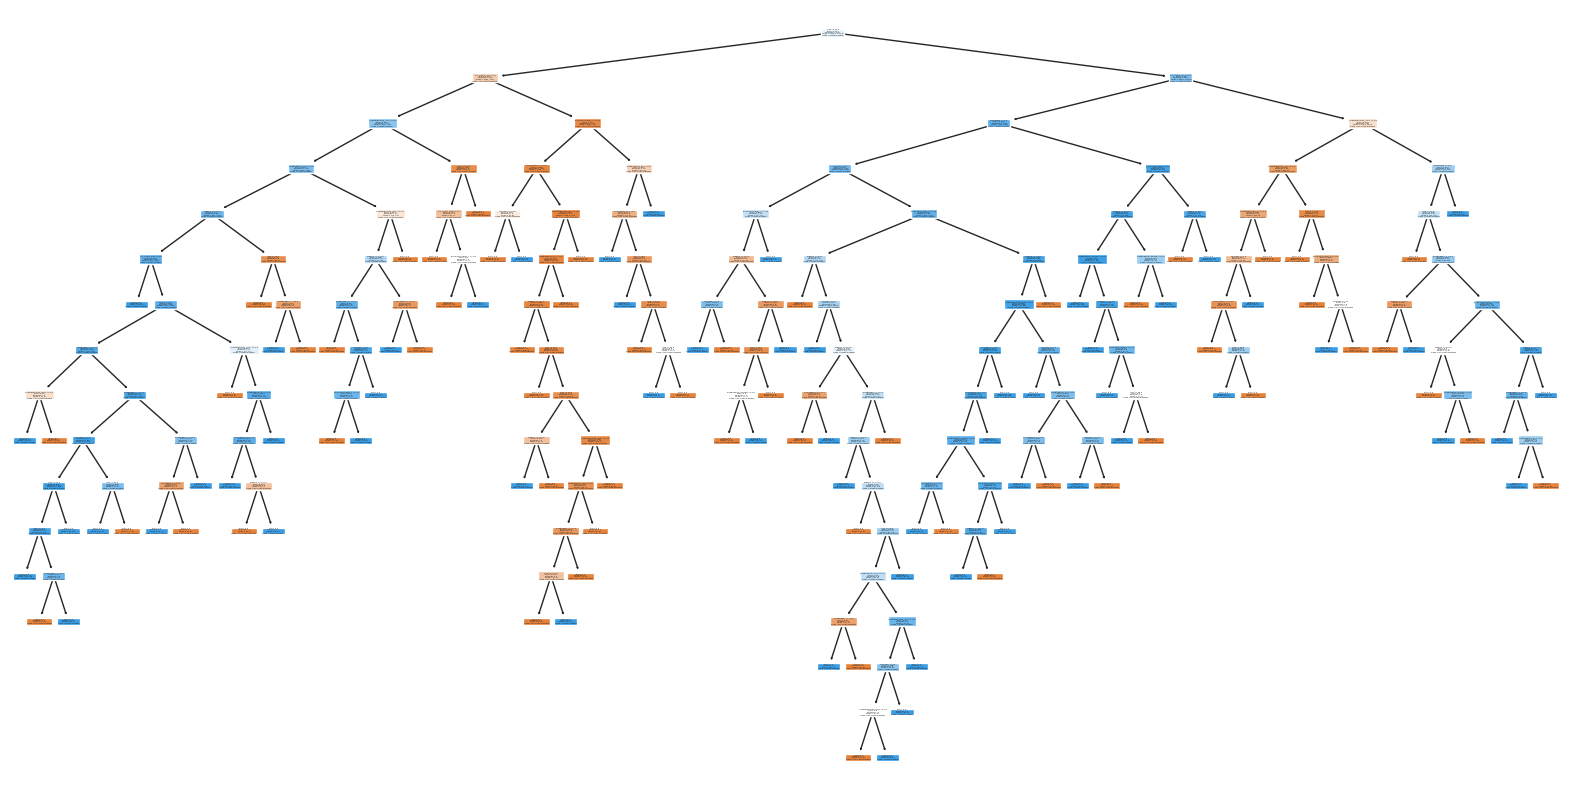

Permutation Feature Importance:
Cholesterol: 0.030 (+/- 0.010)
ST_Slope_Up: 0.026 (+/- 0.016)
ChestPainType_ASY: 0.025 (+/- 0.011)
ST_Slope_Flat: 0.020 (+/- 0.015)
FastingBS: 0.016 (+/- 0.004)
RestingBP: 0.013 (+/- 0.008)
MaxHR: 0.010 (+/- 0.009)
Oldpeak: 0.010 (+/- 0.016)
ExerciseAngina_Y: 0.009 (+/- 0.007)
ST_Slope_Down: 0.005 (+/- 0.000)
ChestPainType_TA: 0.005 (+/- 0.002)
ChestPainType_ATA: 0.004 (+/- 0.003)
RestingECG_LVH: 0.004 (+/- 0.002)
Sex_M: 0.004 (+/- 0.004)
RestingECG_ST: 0.001 (+/- 0.002)
RestingECG_Normal: -0.001 (+/- 0.004)
ExerciseAngina_N: -0.002 (+/- 0.008)
ChestPainType_NAP: -0.002 (+/- 0.002)
Sex_F: -0.009 (+/- 0.006)
Age: -0.010 (+/- 0.006)


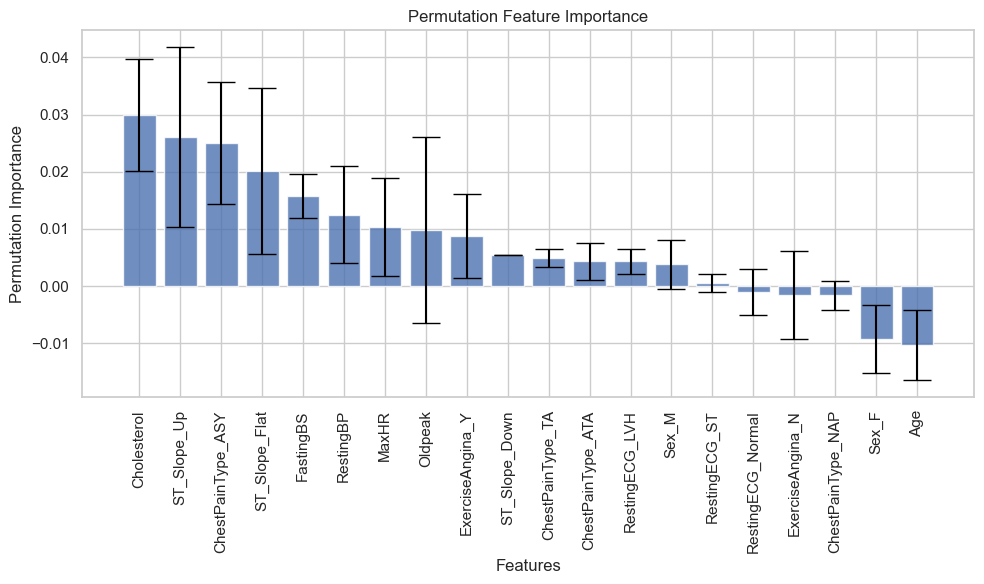

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Read the dataset
data = pd.read_csv('heart.csv')

# Separate the features (X) and target variable (y)
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

tn, fp, fn, tp = confusion.ravel()
tpr = recall
tnr = tn / (tn + fp)
ppv = precision
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion)
print("Precision (PPV):", precision)
print("Recall (TPR):", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("True Positive Rate (TPR):", tpr)
print("True Negative Rate (TNR):", tnr)
print("False Positive Rate (FPR):", fpr)
print("False Negative Rate (FNR):", fnr)

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(confusion, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['No Heart Disease', 'Heart Disease'])
plt.yticks(tick_marks, ['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
thresh = confusion.max() / 2.0
for i in range(confusion.shape[0]):
    for j in range(confusion.shape[1]):
        plt.text(j, i, format(confusion[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if confusion[i, j] > thresh else "black")
plt.tight_layout()
plt.show()

# Visualize a decision tree from the Random Forest
plt.figure(figsize=(20, 10))
plot_tree(model.estimators_[0], filled=True, feature_names=X.columns, class_names=['No Heart Disease', 'Heart Disease'])
plt.show()

# Perform sensitivity analysis using permutation feature importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
importances = result.importances_mean
std = result.importances_std

# Sort the features by importance
sorted_idx = importances.argsort()[::-1]
sorted_importances = importances[sorted_idx]
sorted_std = std[sorted_idx]
sorted_feature_names = X.columns[sorted_idx]

# Print the sorted feature importances
print("Permutation Feature Importance:")
for feature, importance, std in zip(sorted_feature_names, sorted_importances, sorted_std):
    print(f"{feature}: {importance:.3f} (+/- {std:.3f})")

# Plot the feature importances with error bars
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances, yerr=sorted_std, align='center', alpha=0.8, ecolor='black', capsize=10)
plt.xticks(range(len(sorted_importances)), sorted_feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Permutation Importance')
plt.title('Permutation Feature Importance')
plt.tight_layout()
plt.show()


#### Random Forest's Results and interpretation ####

The Random Forest model's ROC AUC score is higher than the decision tree's, with ROC AUC = 0.879. Precision (PPV) = 0.905, and True Positive Rate (TPR) = 0.888.  
However, the false negative rate (FNR) = 0.112 indicates that there is a rate of approximately 11% that incorrectly predicts cardiovascular disease (CVD) but not cardiovascular disease (CVD).  
The better the disease prediction model, the higher the true positive rate (TPR) and the lower the false negative rate (FNR).  
The best Random Fores are visualized as more complicated than decision trees because of the depth of the trees.   
The permutation importance chart shows that the highest essential features are Cholesterol, ST_Slope_Up, and ChestPainType_ASY.

## 10. Adaboost classifier ##


In this study, the dataset is divided into training and testing datasets, and an Adaboost model is created to determine the disease,   
Calculate the hyperparameters and select the best model.	
Next, create ACC, TPR, TNR, PPV, FPR, FNR, F1, ROC, and Confusion Matrix.  
The ROC curve is then charted.  
Then, create a chart of the Confusion Matrix.  
Next, the importance of the features is analyzed, as is the importance of the permutation feature.

Best Hyperparameters:
{'learning_rate': 0.1, 'n_estimators': 100}
Accuracy (Best Model): 0.8641304347826086
Confusion Matrix (Best Model):
[[68  9]
 [16 91]]
Precision (PPV) (Best Model): 0.91
Recall (TPR) (Best Model): 0.8504672897196262
F1 Score (Best Model): 0.8792270531400966
ROC AUC Score (Best Model): 0.8667920864182546
True Positive Rate (TPR) (Best Model): 0.8504672897196262
True Negative Rate (TNR) (Best Model): 0.8831168831168831
False Positive Rate (FPR) (Best Model): 0.11688311688311688
False Negative Rate (FNR) (Best Model): 0.14953271028037382


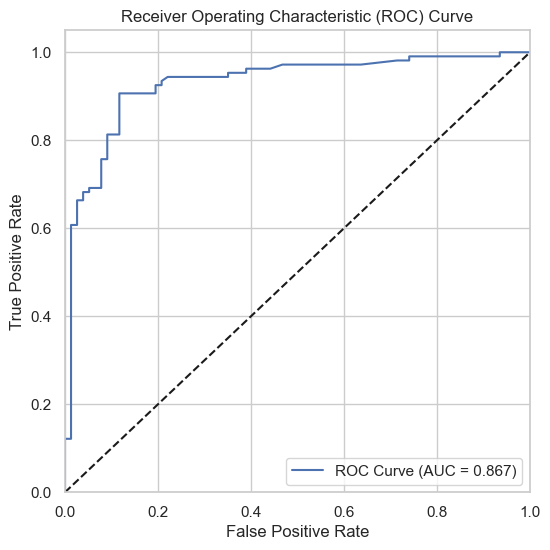

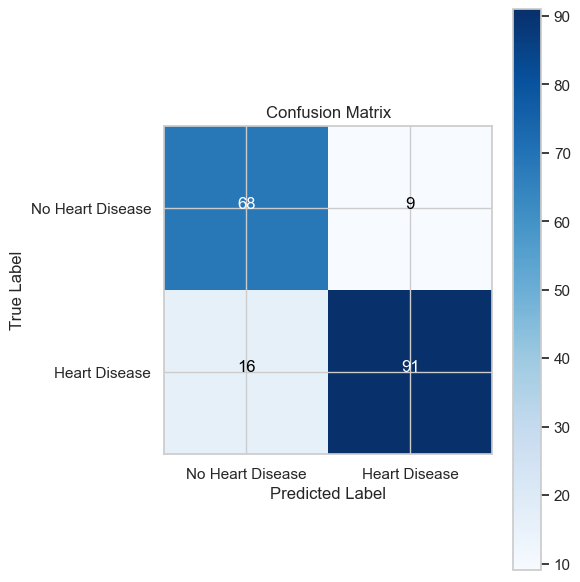

Permutation Feature Importance:
ST_Slope_Up: 0.080 (+/- 0.012)
ChestPainType_ASY: 0.039 (+/- 0.010)
FastingBS: 0.024 (+/- 0.007)
Cholesterol: 0.022 (+/- 0.008)
MaxHR: 0.010 (+/- 0.006)
ChestPainType_TA: 0.000 (+/- 0.000)
RestingBP: 0.000 (+/- 0.000)
ChestPainType_NAP: 0.000 (+/- 0.000)
ChestPainType_ATA: 0.000 (+/- 0.000)
RestingECG_LVH: 0.000 (+/- 0.000)
RestingECG_Normal: 0.000 (+/- 0.000)
RestingECG_ST: 0.000 (+/- 0.000)
ST_Slope_Down: 0.000 (+/- 0.000)
Oldpeak: -0.001 (+/- 0.008)
ExerciseAngina_N: -0.002 (+/- 0.004)
ExerciseAngina_Y: -0.002 (+/- 0.004)
Sex_M: -0.002 (+/- 0.004)
Age: -0.002 (+/- 0.005)
Sex_F: -0.008 (+/- 0.004)
ST_Slope_Flat: -0.010 (+/- 0.004)


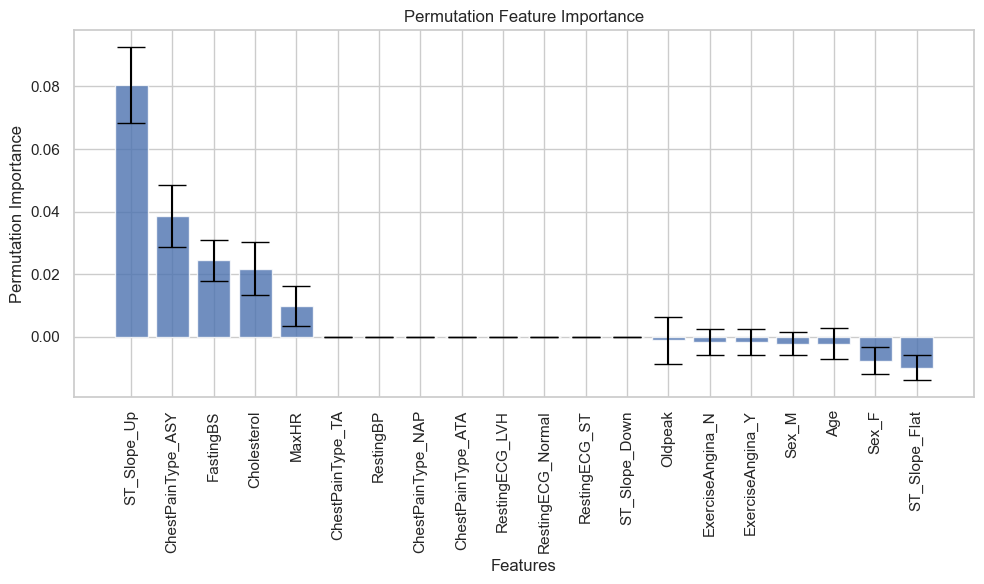

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Read the dataset
data = pd.read_csv('heart.csv')

# Separate the features (X) and target variable (y)
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an AdaBoost model
base_estimator = DecisionTreeClassifier(max_depth=1)
model = AdaBoostClassifier(base_estimator, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Perform hyperparameter tuning using grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(grid_search.best_params_)

# Make predictions using the best model
y_pred_best = best_model.predict(X_test)

# Calculate evaluation metrics for the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
confusion_best = confusion_matrix(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_pred_best)

tn, fp, fn, tp = confusion_best.ravel()
tpr = recall_best
tnr = tn / (tn + fp)
ppv = precision_best
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

# Print the evaluation metrics for the best model
print("Accuracy (Best Model):", accuracy_best)
print("Confusion Matrix (Best Model):")
print(confusion_best)
print("Precision (PPV) (Best Model):", precision_best)
print("Recall (TPR) (Best Model):", recall_best)
print("F1 Score (Best Model):", f1_best)
print("ROC AUC Score (Best Model):", roc_auc_best)
print("True Positive Rate (TPR) (Best Model):", tpr)
print("True Negative Rate (TNR) (Best Model):", tnr)
print("False Positive Rate (FPR) (Best Model):", fpr)
print("False Negative Rate (FNR) (Best Model):", fnr)

# Plot the ROC curve for the best model
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(6, 6))
plt.plot(fpr_best, tpr_best, label=f'ROC Curve (AUC = {roc_auc_best:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(confusion_best, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['No Heart Disease', 'Heart Disease'])
plt.yticks(tick_marks, ['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
thresh = confusion_best.max() / 2.0
for i in range(confusion_best.shape[0]):
    for j in range(confusion_best.shape[1]):
        plt.text(j, i, format(confusion_best[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if confusion_best[i, j] > thresh else "black")
plt.tight_layout()
plt.show()


# Perform sensitivity analysis using permutation feature importance
result = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42)
importances = result.importances_mean
std = result.importances_std

# Sort the features by importance
sorted_idx = importances.argsort()[::-1]
sorted_importances = importances[sorted_idx]
sorted_std = std[sorted_idx]
sorted_feature_names = X.columns[sorted_idx]

# Print the sorted feature importances
print("Permutation Feature Importance:")
for feature, importance, std in zip(sorted_feature_names, sorted_importances, sorted_std):
    print(f"{feature}: {importance:.3f} (+/- {std:.3f})")

# Plot the feature importances with error bars
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances, yerr=sorted_std, align='center', alpha=0.8, ecolor='black', capsize=10)
plt.xticks(range(len(sorted_importances)), sorted_feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Permutation Importance')
plt.title('Permutation Feature Importance')
plt.tight_layout()
plt.show()

#### Random Forest's Results and interpretation ####

The Random Fores model's ROC AUC score is higher than the decision tree's, with ROC AUC = 0.867. Precision (PPV) = 0.91, and True Positive Rate (TPR) = 0.850.  
However, the false negative rate (FNR) = 0.150 indicates that there is a rate of approximately 15% that incorrectly predicts cardiovascular disease (CVD) but not cardiovascular disease (CVD).  
The better the disease prediction model, the higher the true positive rate (TPR) and the lower the false negative rate (FNR).  
The permutation importance chart shows that the highest essential features are ST_Slope_Up, ChestPainType_ASY, and FastingBS.  

## 11. Support Vector Machine ##

This Study divides the dataset into training and testing datasets and creates a support vector machine model to determine the disease,   
Perform calculations using grid-search CVs and select the best model.  
Next, create a heatmap of C versus gamma cross-validation accuracy for the test dataset.  	
Next, create ACC, TPR, TNR, PPV, FPR, FNR, F1, ROC, and Confusion matrices.  
A graph of the ROC curve is then created.  
And create a graph of the Confusion Matrix.  
As sensitivity analysis,the permutation feature is created by graphs.

Best Hyperparameters:
{'C': 1, 'gamma': 0.01}


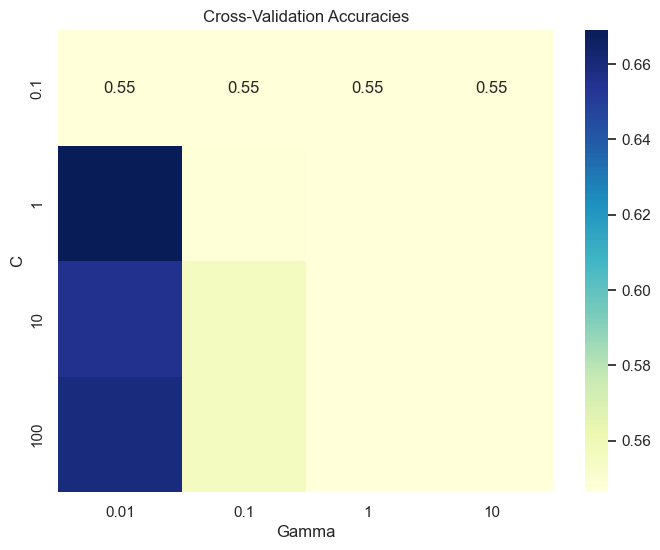

Accuracy (Best Model): 0.6793478260869565
Confusion Matrix (Best Model):
[[44 33]
 [26 81]]
Precision (PPV) (Best Model): 0.7105263157894737
Recall (TPR) (Best Model): 0.7570093457943925
F1 Score (Best Model): 0.7330316742081447
ROC AUC Score (Best Model): 0.6642189586114818
True Positive Rate (TPR) (Best Model): 0.7570093457943925
True Negative Rate (TNR) (Best Model): 0.5714285714285714
False Positive Rate (FPR) (Best Model): 0.42857142857142855
False Negative Rate (FNR) (Best Model): 0.24299065420560748


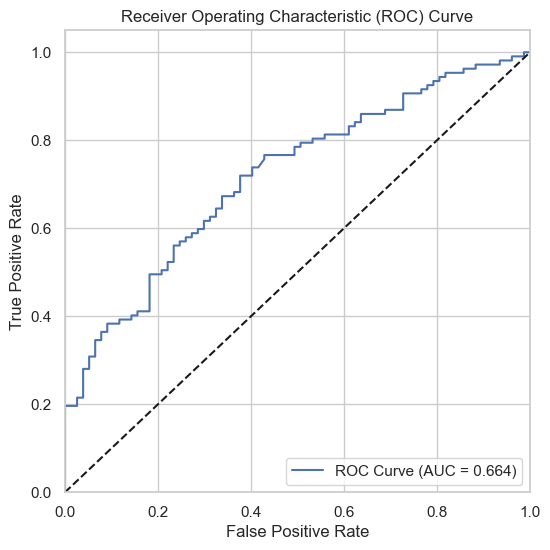

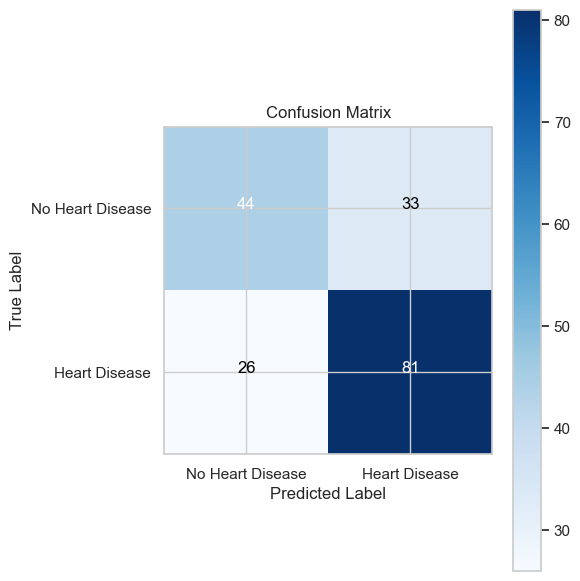

Permutation Feature Importance:
MaxHR: 0.078 (+/- 0.025)
Cholesterol: 0.068 (+/- 0.021)
Age: 0.045 (+/- 0.017)
RestingBP: 0.015 (+/- 0.023)
ChestPainType_NAP: 0.000 (+/- 0.000)
FastingBS: 0.000 (+/- 0.000)
Sex_F: 0.000 (+/- 0.000)
Sex_M: 0.000 (+/- 0.000)
ST_Slope_Flat: 0.000 (+/- 0.000)
ST_Slope_Up: 0.000 (+/- 0.000)
ChestPainType_TA: 0.000 (+/- 0.000)
RestingECG_LVH: 0.000 (+/- 0.000)
RestingECG_Normal: 0.000 (+/- 0.000)
RestingECG_ST: 0.000 (+/- 0.000)
ExerciseAngina_N: 0.000 (+/- 0.000)
ExerciseAngina_Y: 0.000 (+/- 0.000)
ST_Slope_Down: 0.000 (+/- 0.000)
ChestPainType_ATA: 0.000 (+/- 0.000)
Oldpeak: -0.001 (+/- 0.004)
ChestPainType_ASY: -0.003 (+/- 0.003)


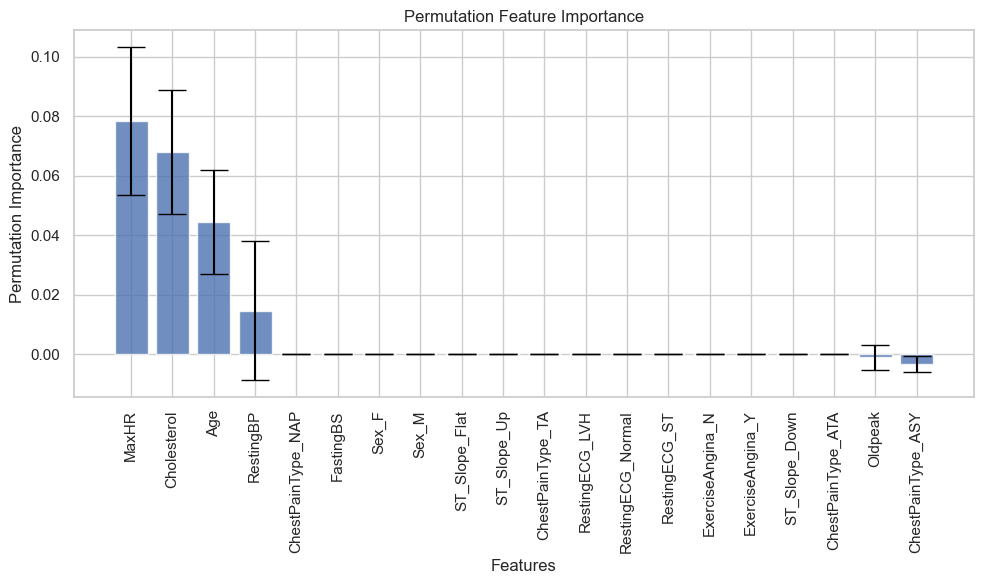

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
data = pd.read_csv('heart.csv')

# Separate the features (X) and target variable (y)
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM model
model = SVC(kernel='rbf', random_state=42, probability=True)

# Define the parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 10]
}

# Perform grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(grid_search.best_params_)

# Create a heatmap of cross-validation accuracies
cv_results = grid_search.cv_results_
mean_test_scores = cv_results['mean_test_score'].reshape(len(param_grid['C']), len(param_grid['gamma']))

plt.figure(figsize=(8, 6))
sns.heatmap(mean_test_scores, annot=True, cmap='YlGnBu', xticklabels=param_grid['gamma'], yticklabels=param_grid['C'])
plt.xlabel('Gamma')
plt.ylabel('C')
plt.title('Cross-Validation Accuracies')
plt.show()

# Make predictions using the best model
y_pred_best = best_model.predict(X_test)

# Calculate evaluation metrics for the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
confusion_best = confusion_matrix(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_pred_best)

tn, fp, fn, tp = confusion_best.ravel()
tpr = recall_best
tnr = tn / (tn + fp)
ppv = precision_best
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

# Print the evaluation metrics for the best model
print("Accuracy (Best Model):", accuracy_best)
print("Confusion Matrix (Best Model):")
print(confusion_best)
print("Precision (PPV) (Best Model):", precision_best)
print("Recall (TPR) (Best Model):", recall_best)
print("F1 Score (Best Model):", f1_best)
print("ROC AUC Score (Best Model):", roc_auc_best)
print("True Positive Rate (TPR) (Best Model):", tpr)
print("True Negative Rate (TNR) (Best Model):", tnr)
print("False Positive Rate (FPR) (Best Model):", fpr)
print("False Negative Rate (FNR) (Best Model):", fnr)

# Plot the ROC curve for the best model
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(6, 6))
plt.plot(fpr_best, tpr_best, label=f'ROC Curve (AUC = {roc_auc_best:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(confusion_best, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['No Heart Disease', 'Heart Disease'])
plt.yticks(tick_marks, ['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
thresh = confusion_best.max() / 2.0
for i in range(confusion_best.shape[0]):
    for j in range(confusion_best.shape[1]):
        plt.text(j, i, format(confusion_best[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if confusion_best[i, j] > thresh else "black")
plt.tight_layout()
plt.show()

# Perform sensitivity analysis using permutation feature importance
result = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42)
importances = result.importances_mean
std = result.importances_std

# Sort the features by importance
sorted_idx = importances.argsort()[::-1]
sorted_importances = importances[sorted_idx]
sorted_std = std[sorted_idx]
sorted_feature_names = X.columns[sorted_idx]

# Print the sorted feature importances
print("Permutation Feature Importance:")
for feature, importance, std in zip(sorted_feature_names, sorted_importances, sorted_std):
    print(f"{feature}: {importance:.3f} (+/- {std:.3f})")

# Plot the feature importances with error bars
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances, yerr=sorted_std, align='center', alpha=0.8, ecolor='black', capsize=10)
plt.xticks(range(len(sorted_importances)), sorted_feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Permutation Importance')
plt.title('Permutation Feature Importance')
plt.tight_layout()
plt.show()

#### Random Forest's Results and interpretation ####

The Support Vector Machine's ROC AUC score is the lowest, at 0.664. Precision (PPV) is 0.711, and True Positive Rate (TPR) is 0.757.  
The Best Hyperparameters are C=1 and Gamma=0.01.  
However, the false negative rate (FNR) = 0.243 indicates that there is a rate of approximately 24% that incorrectly predicts cardiovascular disease (CVD) but not cardiovascular disease (CVD).  
The better the disease prediction model, the higher the true positive rate (TPR) and the lower the false negative rate (FNR).  
The permutation importance chart shows that the highest essential features are MaxGR, Cholesterol, and Age.  

## 12. Interpretation of the Analysis Result ##

If someone has Cardiovascular diseases (CVDs), it is critical to predict them correctly, so the True Positive Rate (TPR) is the most crucial factor in judging which model is the best. The analysis result summarization below shows that the Random Forest is the best model.   
Moreover, based on the importance of the permutation feature, ST_Slope_UP, ChestPainType_ASY, FastingBS, and Cholesterol are the top features that positively correlate with cardiovascular diseases.

|  Rank |  Model |   Accuracy |  ROC AUC Score |  True Positive Rate (TPR) | 
|---|:---|---|---|---|
|  1 |  Random Forest |  0.880 | 0.879 | 0.888 | 
|  2 |  Decision Tree | 0.875 | 0.872 | 0.888 | 
|  3 |  Adaboost classifie | 0.864 | 0.867 | 0.850 | 
|  4 |  K-Nearest Neighbors | 0.864 | 0.869| 0.841 | 
|  5 |  Logistic Regression | 0.853 | 0.856 | 0.841 | 
|  6 |  Support Vector Machine | 0.679| 0.664| 0.757 | 

## 13. Conclusion ##

- Random Forest is the best model for predicting Cardiovascular diseases (CVDs). 
- Cholesterol, ST_Slope_UP, CHestPainType_ASY, and ST_Slope_Flat are the top four features correlated with Cardiovascular diseases. 
- The Cardiovascular disease risk score combines these factors to assess an individual's risk and suggest appropriate health goals, lifestyle changes, periodic monitoring, education and support, and prophylaxis. 
- Early detection of risk factors is key to preventing Cardiovascular diseases, and awareness campaigns can educate the public.